<a href="https://colab.research.google.com/github/ishreya09/Skin-Lesion-for-Melanoma-Classification/blob/main/Skin_Melanoma_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting Dataset from kaggle

In [1]:
!pip install kaggle

In [2]:
# configure path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing dataset from kaggle

In [3]:
# !api command
!kaggle datasets download -d andrewmvd/isic-2019



100% 9.10G/9.10G [05:53<00:00, 38.5MB/s]
100% 9.10G/9.10G [05:54<00:00, 27.6MB/s]


In [4]:
!ls

isic-2019.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed file

from zipfile import ZipFile

dataset="/content/isic-2019.zip"

with ZipFile(dataset,'r')as zip:
    zip.extractall()
    print("dataset is extracted")

dataset is extracted


Importing dependencies

In [20]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from tensorflow.math import confusion_matrix




In [12]:
image_data ="/content/ISIC_2019_Training_Input/ISIC_2019_Training_Input/"
csv_data ="/content/ISIC_2019_Training_GroundTruth.csv"
meta_data= "/content/ISIC_2019_Training_Metadata.csv"

In [21]:
df_csv= pd.read_csv(csv_data)
df_meta= pd.read_csv(meta_data)

In [27]:
df_csv.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df_meta.head()

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male


In [31]:
df_meta["lesion_id"].isnull().sum()

2084

In [32]:
df_meta["lesion_id"].value_counts()

BCN_0001728    31
BCN_0003369    27
BCN_0001321    26
BCN_0003196    24
BCN_0001954    21
               ..
HAM_0004752     1
HAM_0000667     1
HAM_0000240     1
HAM_0003075     1
BCN_0001014     1
Name: lesion_id, Length: 11847, dtype: int64

In [22]:
# load images
path,dirs,files= next(os.walk(image_data))
filecount=len(files)
print("Number of images are ",filecount)


Number of images are  25333


In [23]:
file_names= os.listdir(image_data)
# file_names

(1024, 1024, 3)


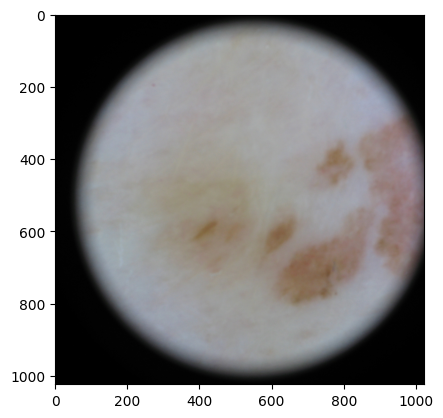

In [26]:
img= mpimg.imread(image_data+file_names[10])
plt.imshow(img)
print(img.shape)
